In [1]:
## Divergence analysis 
from datetime import timedelta
import numpy as np
from glob import glob
import xarray as xr
import matplotlib.pyplot as plt
import cmocean as cm

In [2]:
path1= '/gxfs_work/geomar/smomw662/FESOM_data/channel_interp'

ds_u = xr.open_dataset(f"{path1}/u.1960.nc")
ds_v = xr.open_dataset(f"{path1}/v.1960.nc")
ds_w = xr.open_dataset(f"{path1}/w.1960.nc")
# ufiles = sorted(glob(f"{path1}/u.1960.nc"))
# vfiles = sorted(glob(f"{path1}/v.1960.nc"))
# wfiles = sorted(glob(f"{path1}/w.1960.nc"))

In [15]:
u_sel=ds_u.u.sel(time=slice('1960-01-01'))
v_sel=ds_v.v.sel(time=slice('1960-01-01'))
w_sel=ds_w.w.sel(time=slice('1960-01-01'))

U_3d = u_sel.drop(['nz','elem','elem_center_lons','elem_center_lats','target_lat','target_lon'])
V_3d = v_sel.drop(['nz','elem','elem_center_lons','elem_center_lats','target_lat','target_lon'])
W_3d = w_sel.drop(['nz','nod2','lon','lat'])

W_3d

/tmp/ipykernel_2893396/1528619227.py:5: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  U_3d = u_sel.drop(['nz','elem','elem_center_lons','elem_center_lats','target_lat','target_lon'])
/tmp/ipykernel_2893396/1528619227.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  V_3d = v_sel.drop(['nz','elem','elem_center_lons','elem_center_lats','target_lat','target_lon'])
/tmp/ipykernel_2893396/1528619227.py:7: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  W_3d = w_sel.drop(['nz','nod2','lon','lat'])


<xarray.DataArray 'w' (time: 1, z: 42, grid_lat: 584, grid_lon: 144)> Size: 14MB
[3532032 values with dtype=float32]
Coordinates:
  * time      (time) datetime64[ns] 8B 1960-01-01T23:50:00
  * grid_lon  (grid_lon) float64 1kB 0.0 0.03147 0.06294 ... 4.437 4.469 4.5
  * grid_lat  (grid_lat) float64 5kB 0.0 0.03087 0.06175 ... 17.94 17.97 18.0
  * z         (z) float64 336B 0.0 4.519 14.01 ... 3.459e+03 3.814e+03 4e+03
Attributes:
    description:  vertical velocity
    long_name:    vertical velocity
    units:        m/s
    location:     node
    mesh:         fesom_mesh

In [16]:
## Compute the divergence 
dx = U_3d.grid_lon.diff(dim='grid_lon')
dy = V_3d.grid_lat.diff(dim='grid_lat')
dz = W_3d.grid_lat.diff(dim='z')

In [17]:
# Grid spacing (assuming uniform)
# dx = dy = dz = 1.0
def compute_divergence_xarray(u, v, w, dx, dy, dz):
    # Central difference scheme for interior points using xarray.roll
    du_dx = (u.roll(grid_lon=-1, roll_coords=False) - u.roll(grid_lon=1, roll_coords=False)) / (2 * dx)
    dv_dy = (v.roll(grid_lat=-1, roll_coords=False) - v.roll(grid_lat=1, roll_coords=False)) / (2 * dy)
    dw_dz = (w.roll(z=-1, roll_coords=False) - w.roll(z=1, roll_coords=False)) / (2 * dz)
    
    # Sum of derivatives to compute divergence
    divergence = du_dx + dv_dy + dw_dz
    return divergence

In [18]:
div = compute_divergence_xarray(U_3d, V_3d, W_3d, dx, dy, dz)

In [19]:
div

<xarray.DataArray (time: 1, z: 42, grid_lat: 583, grid_lon: 143)> Size: 28MB
array([[[[-7.79501739e-03, -1.78532171e-02,  1.10980696e-02, ...,
           6.47471703e-06,  5.33291572e-07,  2.29262252e-02],
         [ 9.57316744e-03, -6.53591411e-03, -2.94631637e-03, ...,
           2.98152428e-04,  2.98152428e-04,  2.32238443e-02],
         [-6.11963733e-03,  9.01612620e-03, -2.94544335e-03, ...,
           2.98063547e-04,  2.98063547e-04,  2.43041637e-02],
         ...,
         [ 2.44407666e-08, -8.54569537e-02, -8.54569537e-02, ...,
           2.50126621e-02,  1.79276991e-08, -7.61428846e-02],
         [ 2.43987722e-08, -8.54569536e-02, -8.54569536e-02, ...,
           2.50126621e-02,  2.50126621e-02, -7.61428846e-02],
         [ 4.32068366e-03, -8.11362943e-02, -1.19770818e-01, ...,
          -7.62057071e-03,  1.73920716e-02, -5.87508309e-02]],

        [[-7.79489269e-03, -1.78531846e-02,  1.10981021e-02, ...,
           6.51085727e-06,  4.96874939e-07,  2.29261888e-02],
         [ 9.57316696e-03, -6.53591460e-03, -2.94631905e-03, ...,
           2.98134220e-04,  2.98134220e-04,  2.32238261e-02],
         [-6.11963765e-03,  9.01612587e-03, -2.94544514e-03, ...,
           2.98051408e-04,  2.98051408e-04,  2.43041516e-02],
...
         [-2.92550290e-07, -6.65154832e-02, -6.65154832e-02, ...,
           2.59494846e-02, -8.09025717e-07, -9.51083528e-02],
         [-2.92047626e-07, -6.65154845e-02, -6.65154845e-02, ...,
           2.59494860e-02,  2.59494860e-02, -9.51083514e-02],
         [-2.49961389e-03, -6.90148082e-02, -5.68822057e-02, ...,
          -2.41643532e-02,  1.78594044e-03, -9.33216033e-02]],

        [[-1.42382978e-02, -1.51910408e-02,  2.44197582e-03, ...,
          -3.63899679e-05,  6.89026114e-05,  2.55194932e-02],
         [ 1.04416823e-02, -2.50758835e-03, -1.06931152e-03, ...,
           1.04654298e-03,  1.04654298e-03,  2.64971336e-02],
         [-2.29917525e-03,  9.51508432e-03, -1.05459418e-03, ...,
           1.03505921e-03,  1.03505921e-03,  2.51577059e-02],
         ...,
         [-2.92369007e-07, -6.65154831e-02, -6.65154831e-02, ...,
           2.59494850e-02, -8.08626697e-07, -9.51083524e-02],
         [-2.91866655e-07, -6.65154844e-02, -6.65154844e-02, ...,
           2.59494864e-02,  2.59494864e-02, -9.51083510e-02],
         [-2.49961371e-03, -6.90148081e-02, -5.68822056e-02, ...,
          -2.41643528e-02,  1.78594084e-03, -9.33216029e-02]]]])
Coordinates:
  * time      (time) datetime64[ns] 8B 1960-01-01T23:50:00
  * grid_lon  (grid_lon) float64 1kB 0.03147 0.06294 0.09441 ... 4.437 4.469 4.5
  * grid_lat  (grid_lat) float64 5kB 0.03087 0.06175 0.09262 ... 17.97 18.0
  * z         (z) float64 336B 0.0 4.519 14.01 ... 3.459e+03 3.814e+03 4e+03

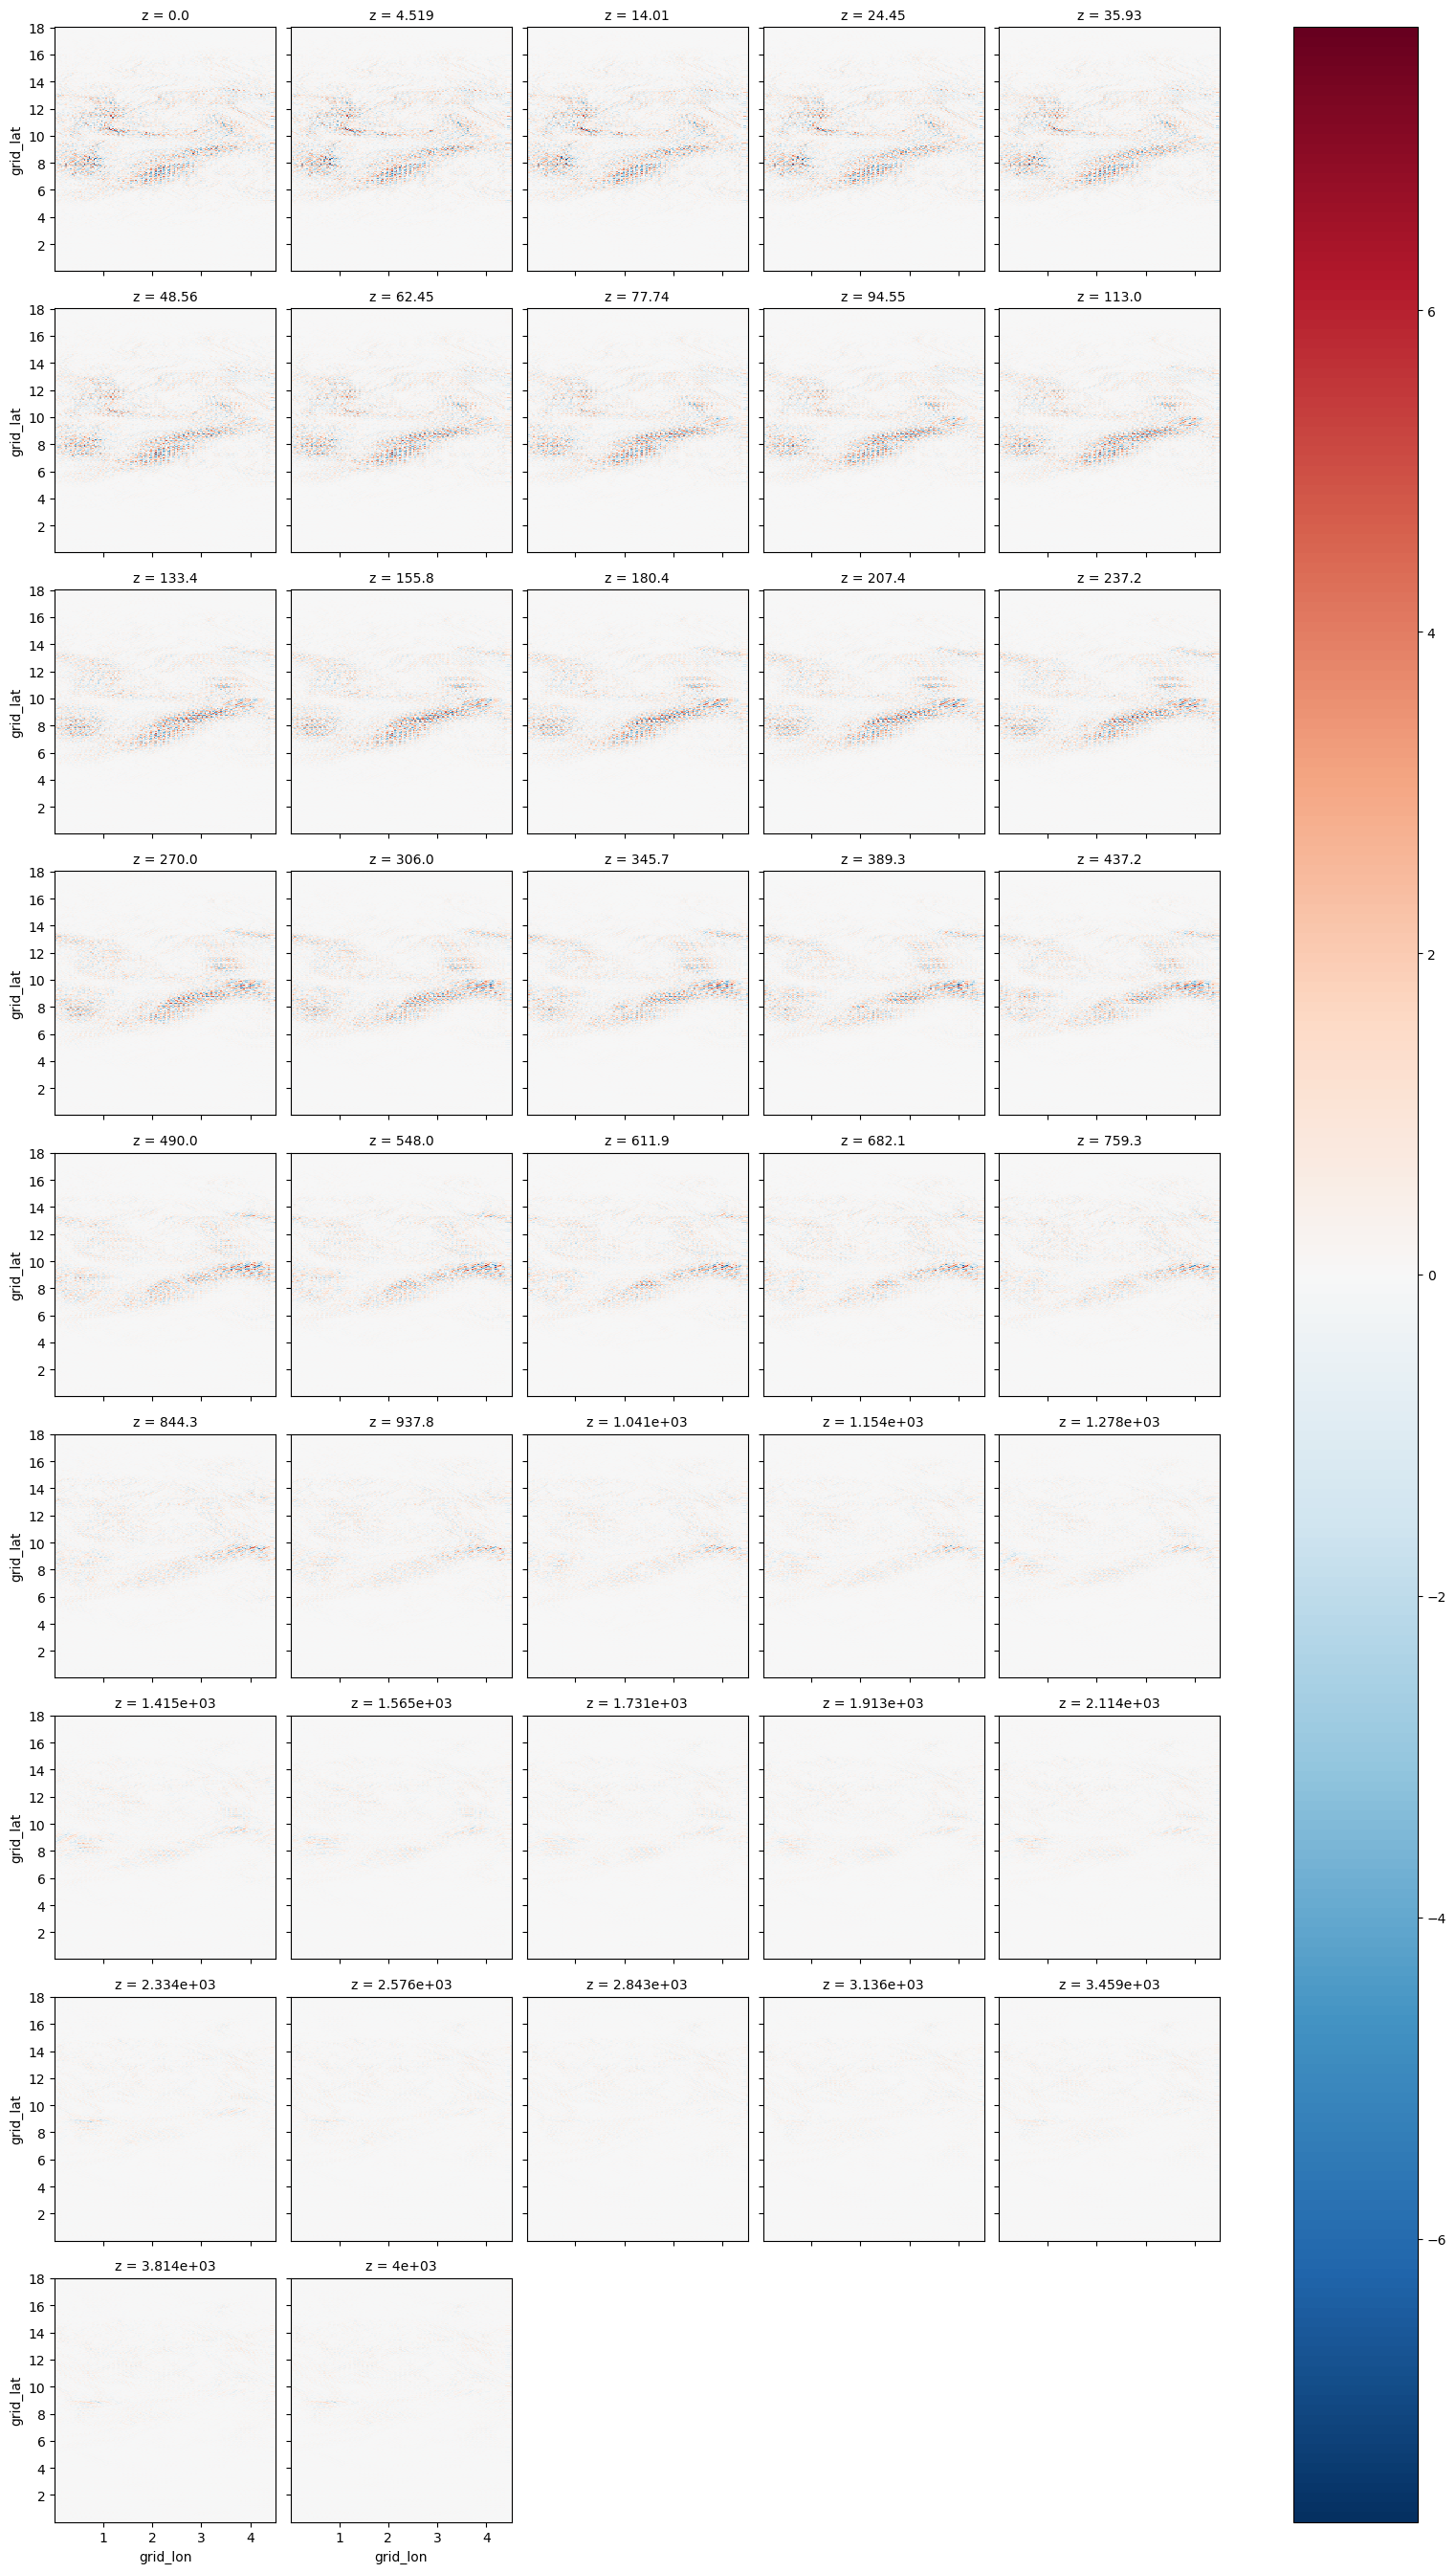

In [20]:
div.sel(time=slice('1960-02-01')).plot(x="grid_lon", y="grid_lat", col="z", col_wrap=5)
# div.sel(time=slice('1960-02-01'))

In [21]:
## Let's try again 
neg_A = -div

# w_k = neg_A * div.z.diff(dim='z')
# div.z.diff(dim='z')

z_k = np.insert(div.z.diff(dim='z'), 0, 0)

z_k_expanded = xr.DataArray(
    z_k,
    dims=["z"],  # Keep the existing z dimension
    coords={"z": neg_A.z},  # Align with neg_A's z coordinates
)

# Broadcast z_k_expanded across the other dimensions of neg_A
z_k_broad = z_k_expanded.broadcast_like(neg_A)

## get the W_k
w_k = neg_A * z_k_broad

/opt/conda/lib/python3.11/site-packages/xarray/core/computation.py:831: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)


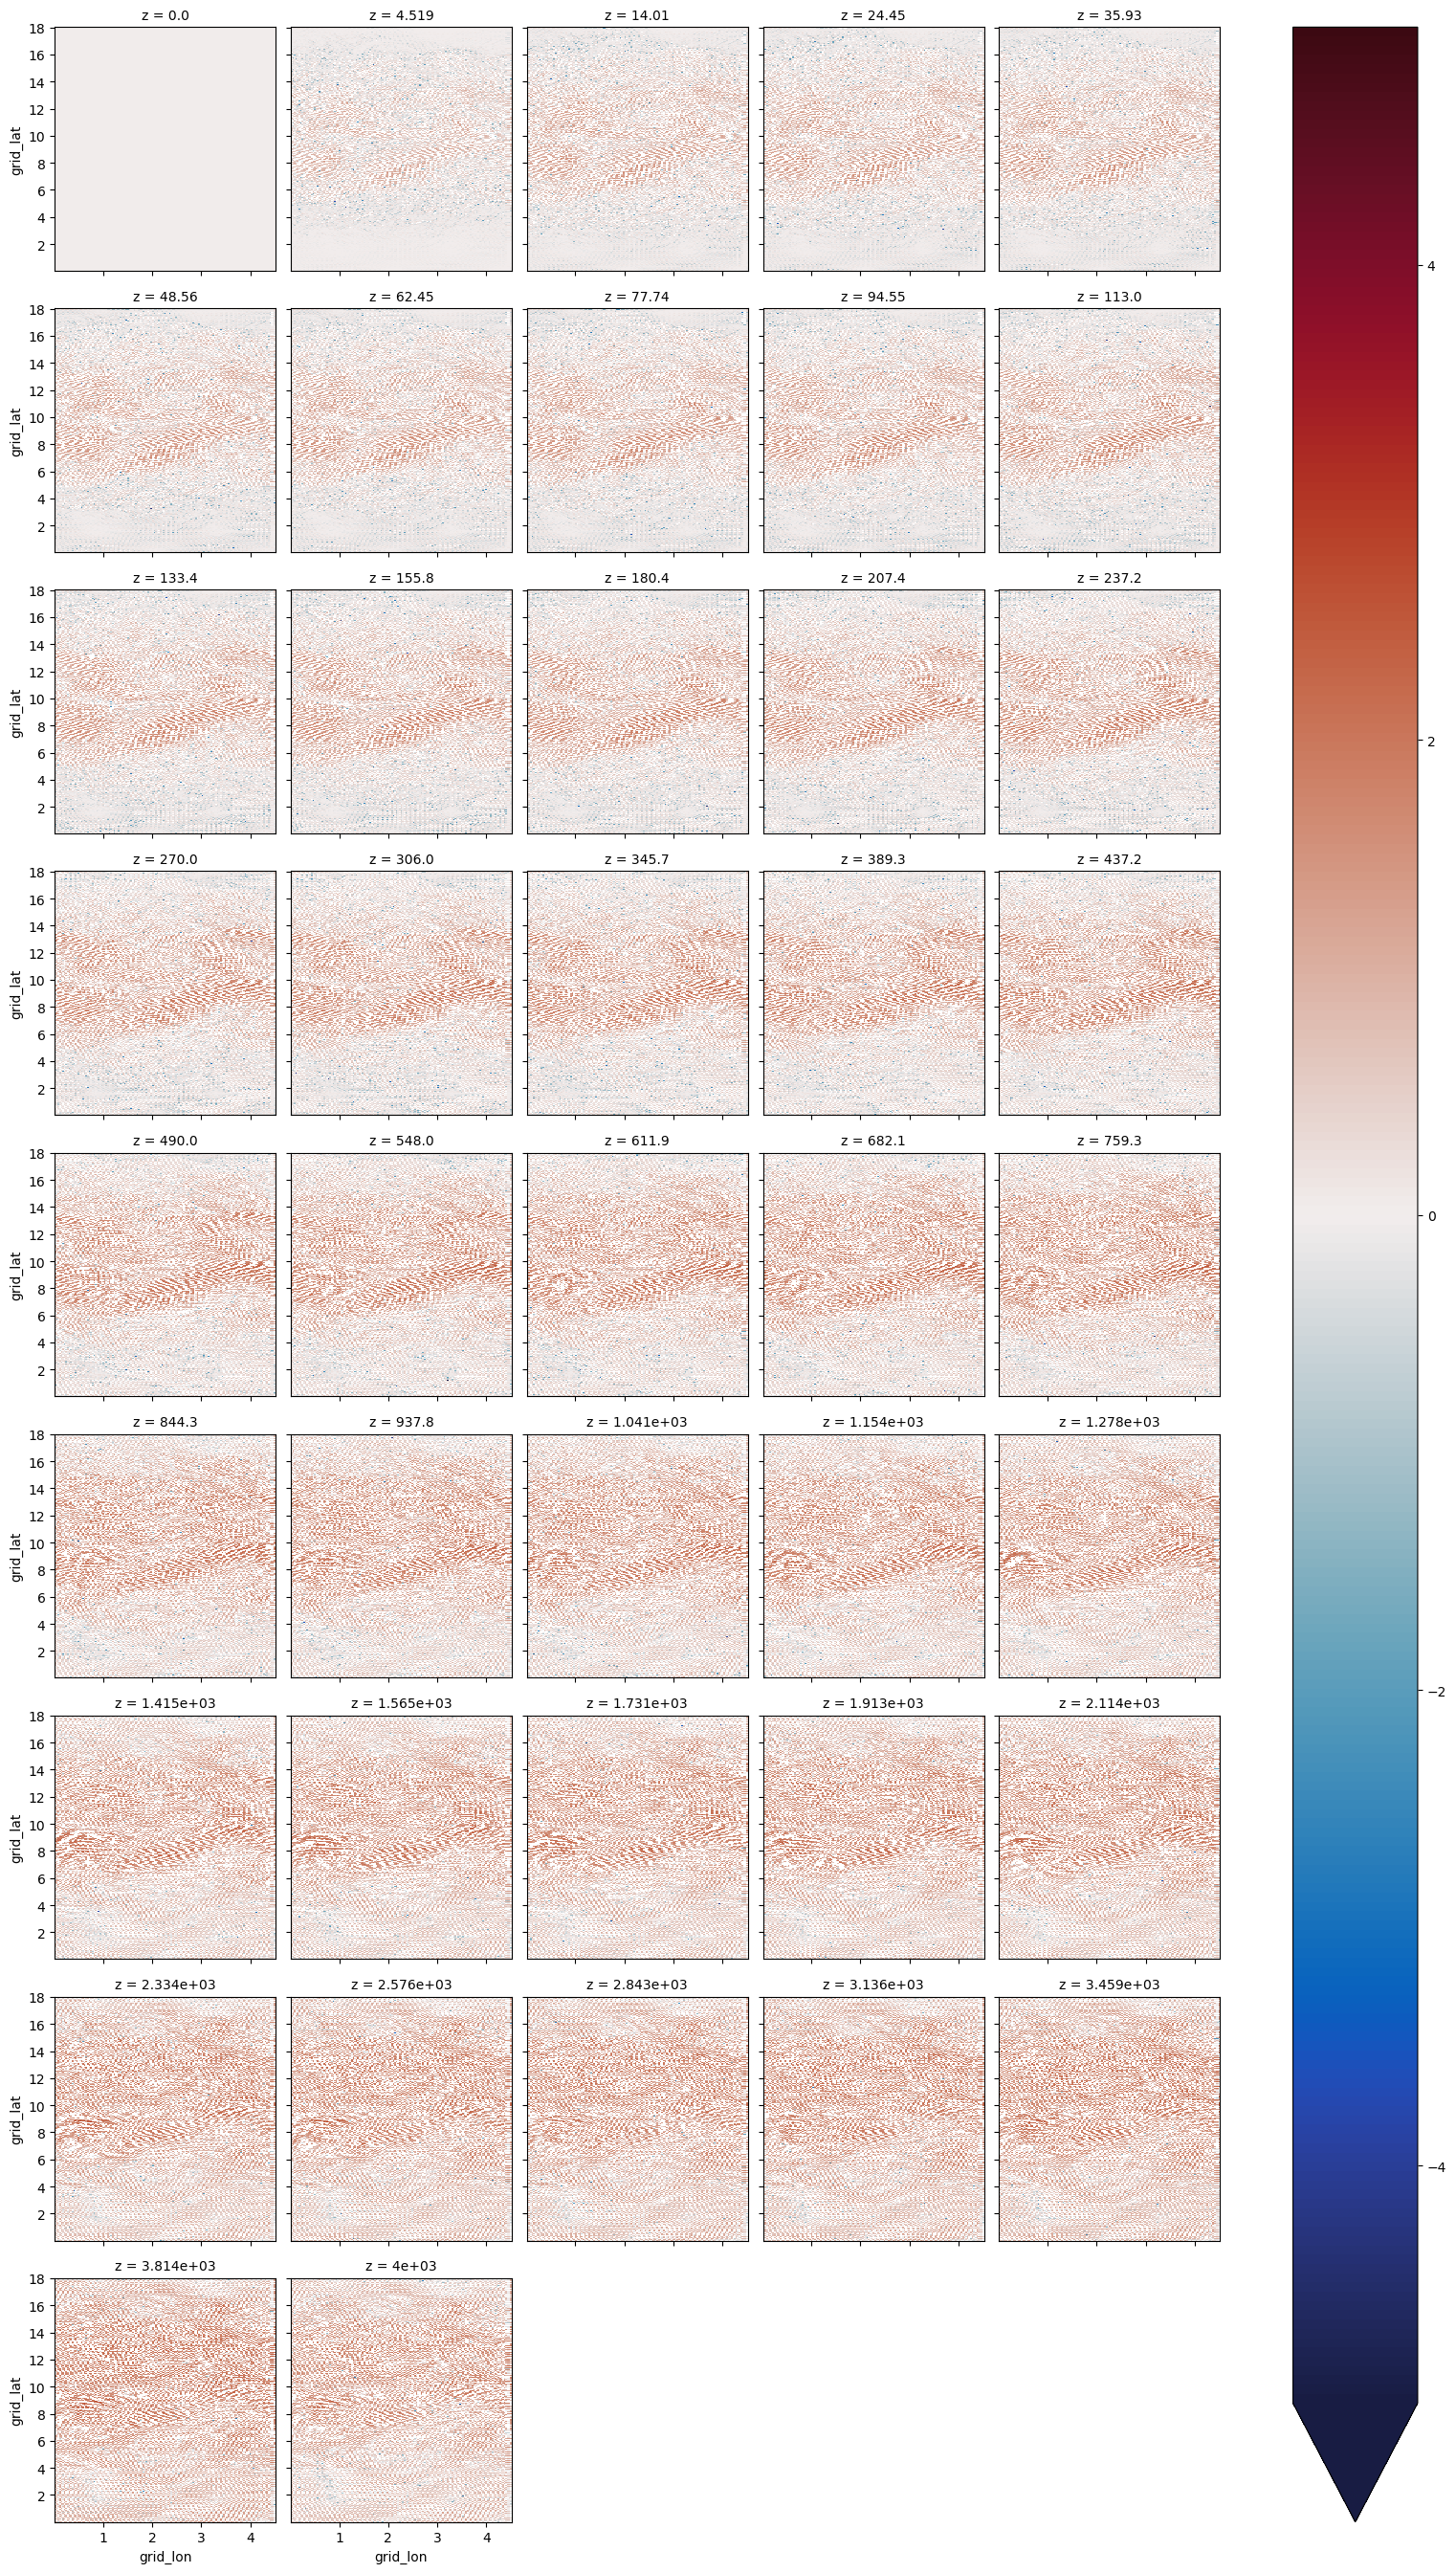

In [22]:
w_k_log = np.log10(w_k+1)
w_k_log.plot(x="grid_lon", y="grid_lat", col="z", col_wrap=5, vmin=-5,vmax=5,cmap=cm.cm.balance)